In [1]:
# pip install seaborn
# pip install statsmodels

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind, mannwhitneyu

In [3]:
df = pd.read_csv('train.csv', encoding='ISO-8859-1')
df.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,NaN,purchasing,62,Quotation or purchase consultation,multi-split,NaN,NaN,/Quezon City/Philippines,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,NaN,media and communication,96,Quotation or purchase consultation,multi-split,NaN,NaN,/PH-00/Philippines,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,NaN,engineering,56,Product Information,single-split,NaN,NaN,/Kolkata /India,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,NaN,entrepreneurship,44,Quotation or purchase consultation,vrf,NaN,NaN,/Bhubaneswar/India,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,NaN,consulting,97,Quotation or purchase consultation,multi-split,NaN,NaN,/Hyderabad/India,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [5]:
df.columns

Index(['bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'customer_job', 'lead_desc_length',
       'inquiry_type', 'product_category', 'product_subcategory',
       'product_modelname', 'customer_country.1', 'customer_position',
       'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea', 'lead_owner', 'is_converted'],
      dtype='object')

In [6]:
df.describe()

,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner
count,59299.000000,14568.000000,59299.000000,13756.000000,3444.0,1121.0,4565.0,59299.000000,59299.000000,59299.000000,18417.000000,15304.000000,59299.000000
mean,0.634593,0.091685,27114.556333,19.912184,1.0,1.0,1.0,79.271590,0.041603,0.050810,0.001117,0.049288,262.563888
std,0.286066,0.150988,14653.911888,44.697938,0.0,0.0,0.0,132.551067,0.199681,0.219612,0.001104,0.027949,231.605681
min,0.000000,0.003788,2.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000002,0.011583,0.000000
25%,0.500000,0.019900,14913.000000,1.000000,1.0,1.0,1.0,7.000000,0.000000,0.000000,0.000298,0.026846,97.000000
50%,0.500000,0.049180,26774.000000,4.000000,1.0,1.0,1.0,29.000000,0.000000,0.000000,0.000572,0.049840,175.000000
75%,1.000000,0.074949,40368.500000,19.000000,1.0,1.0,1.0,92.000000,0.000000,0.000000,0.001183,0.064566,374.000000
max,1.000000,1.000000,47466.000000,1394.000000,1.0,1.0,1.0,1264.000000,1.000000,1.000000,0.003079,0.285714,1114.000000


In [7]:
#1. is_converted가 NA인 데이터 drop
df = df.dropna(subset=['is_converted'])
erased_rows = 59300-len(df)
print('지워진 행: '+str(erased_rows))

지워진 행: 1


In [8]:
print('is_converted unique values:')
df.is_converted.unique()

is_converted unique values:


array([ True, False])

In [9]:
# is_converted 의 값들 정리
# 모두 TRUE or FALSE로 통일, 이외값을 가진 행은 제거
df['is_converted'] = df['is_converted'].astype(str).str.upper()
df = df[df['is_converted'].isin(['TRUE', 'FALSE'])]
print('지워진 행: '+ str(59300-erased_rows-len(df)))

지워진 행: 0


In [10]:
#칼럼별 NA율 정리
# df.isnull().sum()/len(df)*100

In [11]:
#칼럼별 NA율이 50% 이상인 칼럼 나열
for col in df.columns:
    if df[col].isnull().sum()/len(df)*100 > 50:
        print(col, df[col].isnull().sum()/len(df)*100)
        #df.drop(col, axis=1, inplace=True)

com_reg_ver_win_rate 75.43297526096562
customer_type 74.13447107033846
historical_existing_cnt 76.80230695289971
id_strategic_ver 94.19214489283124
it_strategic_ver 98.1095802627363
idit_strategic_ver 92.30172515556755
product_subcategory 84.42638155786776
product_modelname 84.43649977234018
expected_timeline 52.04640887704684
ver_win_rate_x 68.94214067690855
ver_win_ratio_per_bu 74.19180761901549
business_area 68.94214067690855
business_subarea 90.6811244709017


In [12]:
#칼럼별 NA율이 90% 이상인 칼럼 제외
# drop columns with more than 90% missing values
dropped_columns = []
for col in df.columns:
    if df[col].isnull().sum()/len(df)*100 > 90:
        df.drop(col, axis=1, inplace=True)
        
print('number of columns left: '+str(len(df.columns)))

number of columns left: 25


In [13]:
#3.1.중복 행 확인 
df[df.duplicated(keep='first')]

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,lead_owner,is_converted
320,1.00,/East London/South Africa,AS,0.040816,30958,End-Customer,SMB,NaN,business development,302,Quotation or purchase consultation,etc.,NaN,NaN,/East London/South Africa,manager,LGESA,more than a year,1,0,0.003079,0.026846,corporate / office,26,FALSE
322,1.00,/East London/South Africa,AS,0.040816,30958,End Customer,SMB,NaN,business development,302,Quotation or Purchase Consultation,etc.,NaN,NaN,/East London/South Africa,manager,LGESA,more than a year,1,0,0.003079,0.026846,corporate / office,26,FALSE
344,1.00,/Medellin /Colombia,AS,0.003937,39065,NaN,SMB,0.0,engineering,7,Usage or Technical Consultation,vrf,NaN,NaN,/Medellin /Colombia,associate/analyst,LGECB,9 months ~ 1 year,0,0,0.003079,0.026846,corporate / office,41,FALSE
1253,1.00,/Brisbane/Australia,ID,0.084337,14526,NaN,Enterprise,NaN,information technology,35,Quotation or Purchase Consultation,standard signage,NaN,NaN,/Brisbane/Australia,associate/analyst,LGEAP,less than 3 months,0,1,0.003079,0.064566,corporate / office,306,FALSE
1314,1.00,//Ghana,ID,0.075000,4705,Specifier / Influencer,SMB,NaN,entrepreneurship,48,Quotation or Purchase Consultation,interactive signage,TR3DJ Series,75TR3DJ,//Ghana,ceo/founder,LGEAF,less than 3 months,0,1,0.003079,0.064566,corporate / office,170,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59134,0.75,//Mexico,ID,0.042254,33676,NaN,SMB,NaN,sales,88,Quotation or Purchase Consultation,NaN,NaN,NaN,//Mexico,none,LGEMS,less than 3 months,0,0,0.000026,0.031579,public facility,214,TRUE
59262,1.00,/rio de janeiro /Brazil,AS,0.040000,13618,Specifier/ Influencer,Enterprise,NaN,operations,93,Trainings,vrf,NaN,NaN,/rio de janeiro /Brazil,ceo/founder,LGESP,more than a year,0,0,0.000026,0.028777,public facility,97,FALSE
59275,1.00,/Temuco/Chile,AS,0.040000,22100,Specifier/ Influencer,Enterprise,0.0,administrative,3,Quotation or Purchase Consultation,control,NaN,NaN,/Temuco/Chile,manager,LGECL,less than 3 months,0,0,0.000026,0.028777,public facility,100,FALSE
59290,0.75,/DolnoÅlÄ skie/Poland,AS,NaN,6739,Specifier/ Influencer,SMB,NaN,engineering,226,Quotation or Purchase Consultation,single-split,NaN,NaN,/DolnoÅlÄ skie/Poland,entry level,LGEPL,less than 3 months,0,0,0.000026,0.028777,public facility,694,FALSE


In [14]:
# 3.2. 중복 행 제거
df.drop_duplicates(keep='first', inplace=True)
len(df)

55779

In [15]:
 #4. NA율이 높은 칼럼의 True/False 비율 보기
for col in df.columns:
    if df[col].isnull().sum()/len(df)*100 > 50:
        print(df[col].value_counts(dropna=False, normalize=True))


com_reg_ver_win_rate
NaN         0.746966
0.074949    0.020187
0.073248    0.014020
0.003937    0.013769
0.003788    0.012496
              ...   
0.363636    0.000233
0.444444    0.000215
0.400000    0.000215
1.000000    0.000161
0.200000    0.000090
Name: proportion, Length: 81, dtype: float64
customer_type
NaN                             0.741444
End-Customer                    0.117464
End Customer                    0.063572
Specifier/ Influencer           0.041736
Channel Partner                 0.022984
Service Partner                 0.005665
Solution Eco-Partner            0.002295
Installer/Contractor            0.000753
Specifier / Influencer          0.000681
Corporate                       0.000502
Engineer                        0.000323
HVAC Engineer                   0.000305
Technician                      0.000287
Consultant                      0.000269
Developer                       0.000251
Other                           0.000179
Software/Solution Provider      0

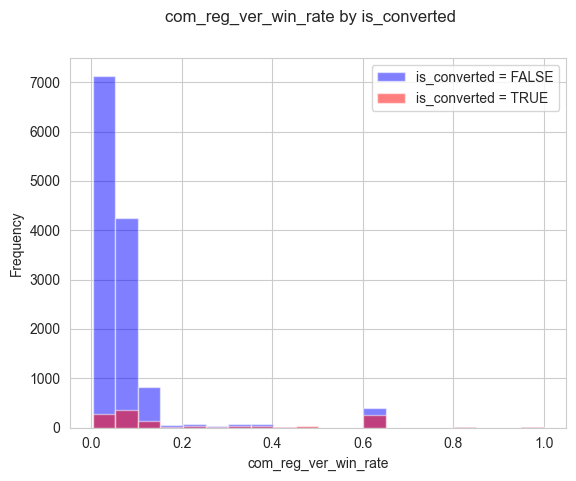

In [16]:
#com_reg_ver_win_rate 74.7%

fig, ax = plt.subplots()

ax.hist(df[df['is_converted'] == 'FALSE']['com_reg_ver_win_rate'], bins=20, alpha=0.5, color='blue', label='is_converted = FALSE')
ax.hist(df[df['is_converted'] == 'TRUE']['com_reg_ver_win_rate'], bins=20, alpha=0.5, color='red', label='is_converted = TRUE')

ax.set_xlabel('com_reg_ver_win_rate')
ax.set_ylabel('Frequency')

fig.suptitle('com_reg_ver_win_rate by is_converted')
ax.legend()


In [17]:
# 상당히 significant한 패턴 발견, t-test로 확인
# 한 그룹의 mean과 다른 그룹의 mean이 차이가 있는지 확인
# Gaussian distribution을 따르는 데이터에 대해서만 사용 가능

df['com_reg_ver_win_rate'] = pd.to_numeric(df['com_reg_ver_win_rate'], errors='coerce')

# Split the data into two groups based on is_converted value
group_true = df[df['is_converted'] == 'TRUE']['com_reg_ver_win_rate'].dropna()
group_false = df[df['is_converted'] == 'FALSE']['com_reg_ver_win_rate'].dropna()

# Run the t-test
t_stat, p_value = ttest_ind(group_true, group_false)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# T-statistic: 양수, p-value 0.05 이하 -> significant
# NA율이 높아도 is_converted에 영향을 미치는 것으로 보임, 가져가야할듯

T-statistic: 41.21953510539725, P-value: 0.0


In [18]:
# Wilcoxon test로 확인사살
# Gaussian distribution을 따르지 않는 데이터에 대해서 사용 가능
# 데이터의 rank based comparison을 수행

df['com_reg_ver_win_rate'] = pd.to_numeric(df['com_reg_ver_win_rate'], errors='coerce')

# Split the data into two groups based on is_converted value
group_true = df[df['is_converted'] == 'TRUE']['com_reg_ver_win_rate'].dropna()
group_false = df[df['is_converted'] == 'FALSE']['com_reg_ver_win_rate'].dropna()

# Run the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(group_true, group_false, alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# p-value 상당히 작음 -> significant

U-statistic: 11564046.0, P-value: 1.184489223141181e-189


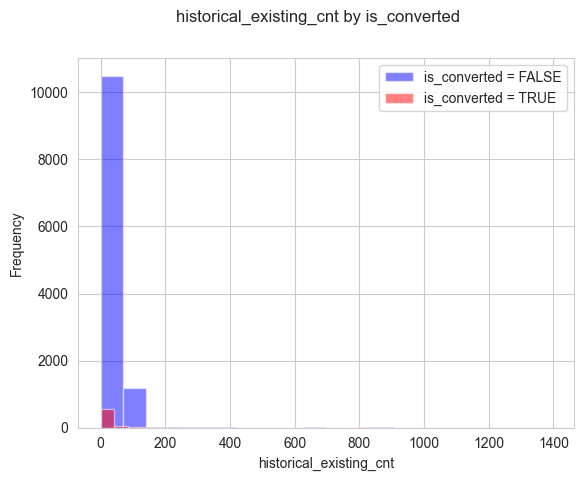

In [19]:
#historical_existing_cnt (77.7%)

fig, ax = plt.subplots()

ax.hist(df[df['is_converted'] == 'FALSE']['historical_existing_cnt'], bins=20, alpha=0.5, color='blue', label='is_converted = FALSE')
ax.hist(df[df['is_converted'] == 'TRUE']['historical_existing_cnt'], bins=20, alpha=0.5, color='red', label='is_converted = TRUE')

ax.set_xlabel('historical_existing_cnt')
ax.set_ylabel('Frequency')

fig.suptitle('historical_existing_cnt by is_converted')
ax.legend()

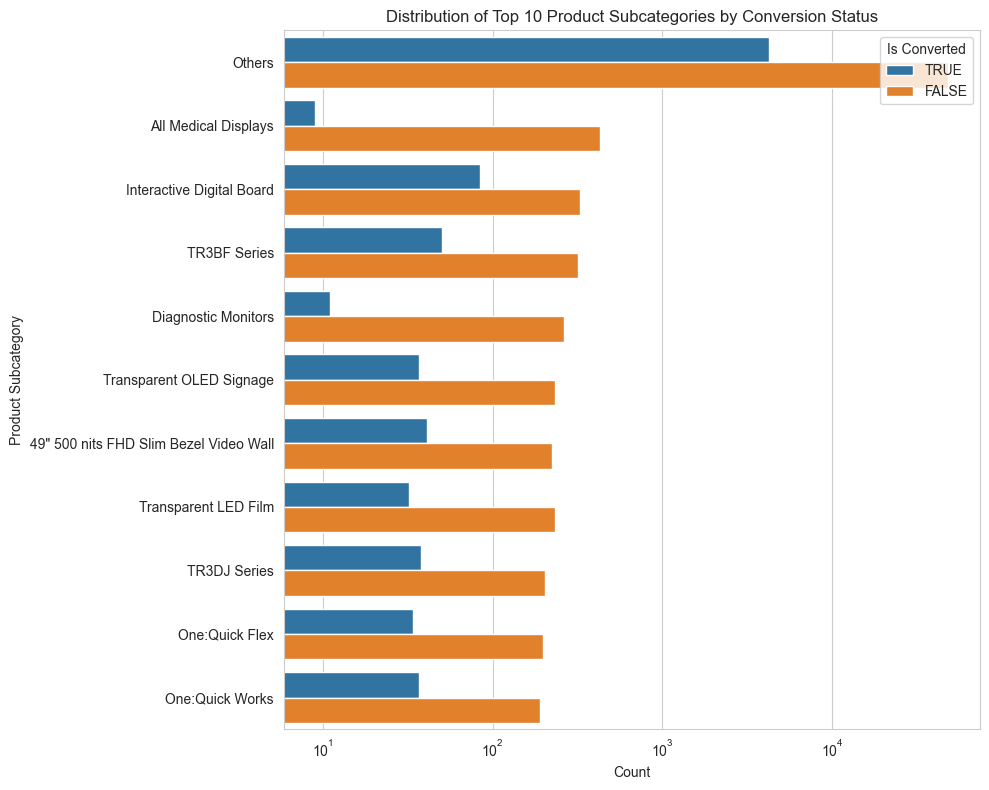

In [20]:
#product_subcategory (83.9%)
#value들이 너무 많아서, 가장 많이 반복되는 value 10개를 제외하고 나머지는 'Others'로 통합

# Focus on top 10 'product_subcategory' values
top_10_subcategories = df['product_subcategory'].value_counts().nlargest(10).index
df['product_subcategory'] = df['product_subcategory'].apply(lambda x: x if x in top_10_subcategories else 'Others')

# Plot adjustments
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.countplot(data=df, y='product_subcategory', hue='is_converted', order=df['product_subcategory'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.title('Distribution of Top 10 Product Subcategories by Conversion Status')
plt.legend(title='Is Converted', loc='upper right')

# Set x-axis to log scale
plt.xscale('log')

plt.tight_layout()
plt.show()

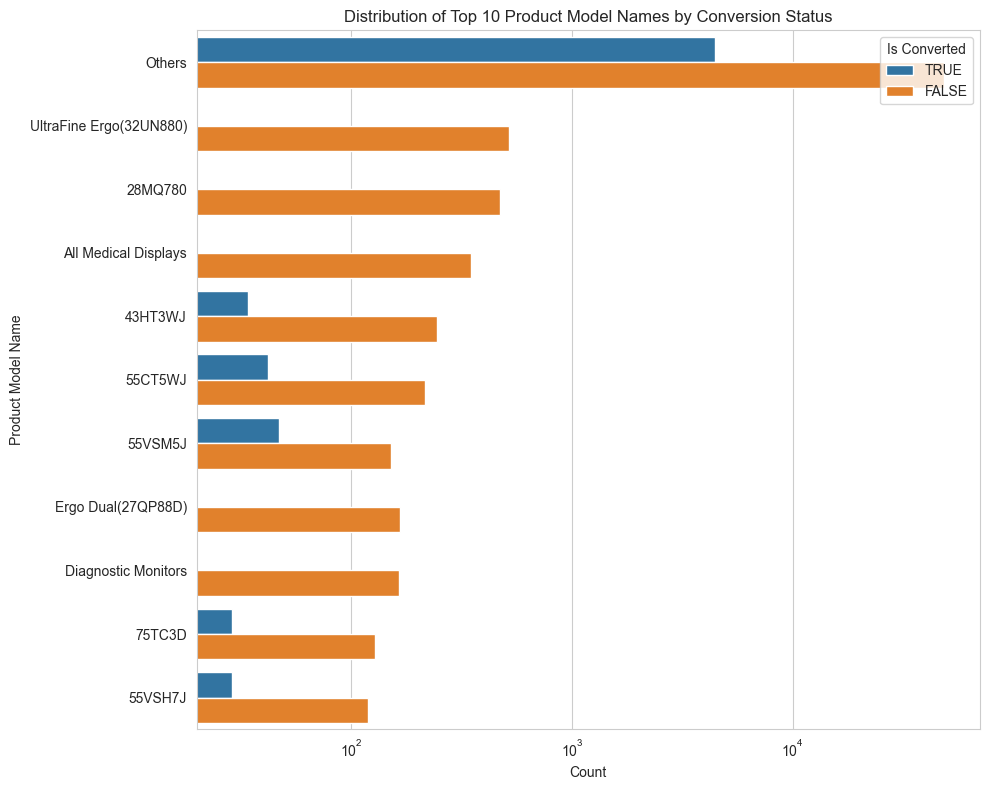

In [21]:
#product_modelname (83.9%)

# 위와 동일한 방법으로 진행

# Focus on top 10 'product_modelname' values
top_10_subcategories = df['product_modelname'].value_counts().nlargest(10).index
df['product_modelname'] = df['product_modelname'].apply(lambda x: x if x in top_10_subcategories else 'Others')

# Plot adjustments
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.countplot(data=df, y='product_modelname', hue='is_converted', order=df['product_modelname'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Product Model Name')
plt.title('Distribution of Top 10 Product Model Names by Conversion Status')
plt.legend(title='Is Converted', loc='upper right')

# Set x-axis to log scale
plt.xscale('log')

plt.tight_layout()
plt.show()

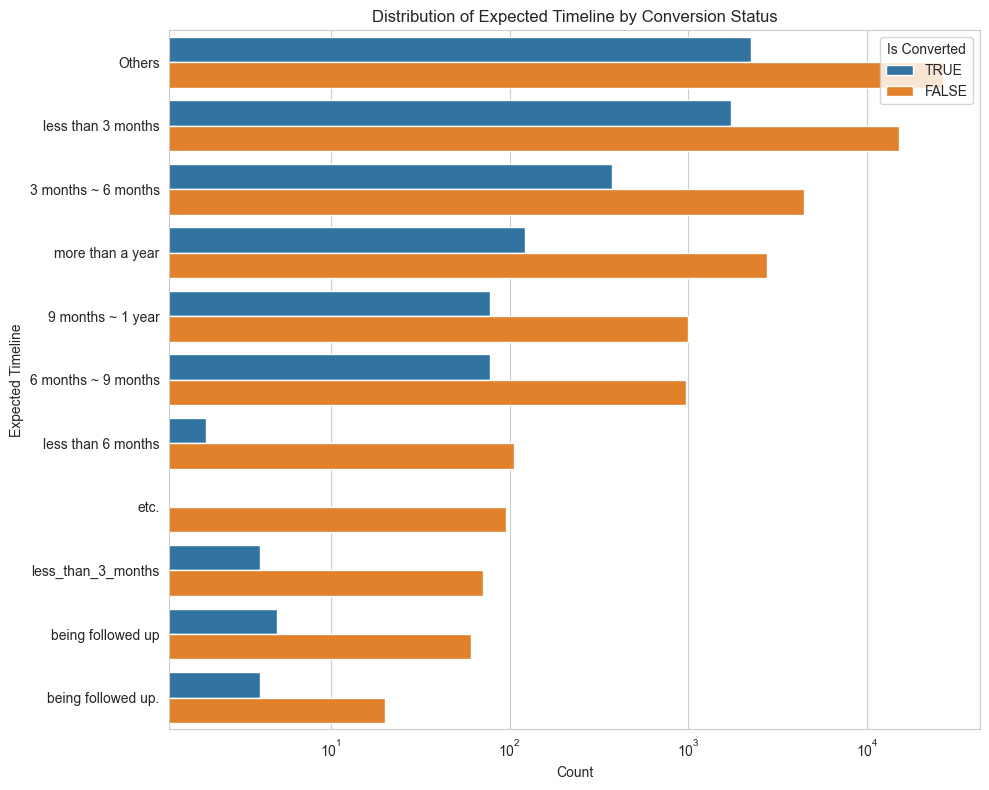

In [22]:
# expected_timeline (50.8%)

top_expected_timelines = df['expected_timeline'].value_counts().nlargest(10).index

# Replace all other 'expected_timeline' values with 'Others'
df['expected_timeline'] = df['expected_timeline'].apply(lambda x: x if x in top_expected_timelines else 'Others')

plt.figure(figsize=(10, 8))  # Adjust figure size for readability
sns.countplot(data=df, y='expected_timeline', hue='is_converted', order=df['expected_timeline'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Expected Timeline')
plt.title('Distribution of Expected Timeline by Conversion Status')
plt.legend(title='Is Converted', loc='upper right')

# If applying a semilog scale is meaningful for the counts
plt.xscale('log')

plt.tight_layout()
plt.show()

In [23]:
# running test chi-square test on expected_timeline
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['expected_timeline'], df['is_converted'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, p-value: {p}")

#Given the p-value is far below the common significance level (α) of 0.05 
#you can reject the null hypothesis and conclude that there is a 
#statistically significant association between the expected_timeline 
#and the conversion status (is_converted). 
#This means that the likelihood of conversion appears to be related to 
#the expected timeline categories you've defined in your dataset.

Chi-squared: 182.40989486015258, p-value: 7.4013533407446e-34


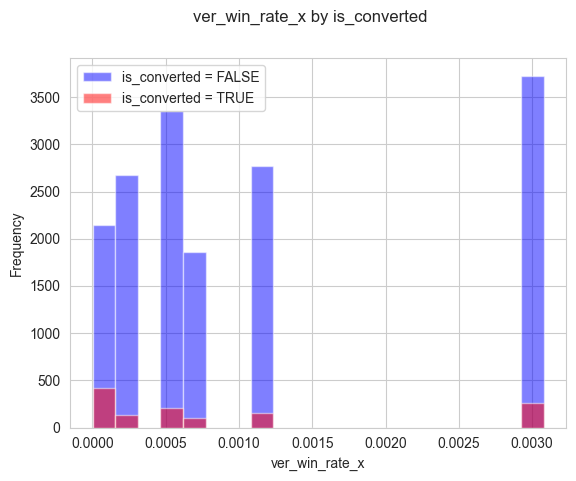

In [24]:
# ver_win_rate_x (68.1%)

fig, ax = plt.subplots()

ax.hist(df[df['is_converted'] == 'FALSE']['ver_win_rate_x'], bins=20, alpha=0.5, color='blue', label='is_converted = FALSE')
ax.hist(df[df['is_converted'] == 'TRUE']['ver_win_rate_x'], bins=20, alpha=0.5, color='red', label='is_converted = TRUE')

ax.set_xlabel('ver_win_rate_x')
ax.set_ylabel('Frequency')

fig.suptitle('ver_win_rate_x by is_converted')
ax.legend()

